In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import tqdm

In [31]:
path_nodes = "/home/sedykh/CHUVdata/IFQuant/version_2/output/01_preprocessed/DEEPMEL_1C1/nodes.csv"
df_nodes = pd.read_csv(path_nodes)

In [16]:
df_nodes

cell_id  cell_x_position  cell_y_position tissue_category phenotype  \
0          9335          12175.1          40468.1          stroma   stromal   
1          9425          12174.1          40482.5          stroma   stromal   
2          9520          12165.6          40756.9          stroma   stromal   
3          9561          12172.6          40856.1          stroma   stromal   
4          9585          12164.1          40800.0          stroma   stromal   
...         ...              ...              ...             ...       ...   
258864   327787           6545.1          37516.4          stroma   stromal   
258865   327788           6503.4          37523.3          stroma   stromal   
258866   327789           6591.2          37515.4          stroma   stromal   
258867   327790           6542.1          37506.0          stroma   stromal   
258868   327791           6597.7          37451.4          stroma   stromal   

        on_border  region  
0           False  stroma  
1           False  stroma  
2           False  stroma  
3           False  stroma  
4           False  stroma  
...           ...     ...  
258864      False  stroma  
258865      False  stroma  
258866      False  stroma  
258867      False  stroma  
258868      False  stroma  

[258869 rows x 7 columns]

<AxesSubplot: xlabel='cell_x_position', ylabel='cell_y_position'>

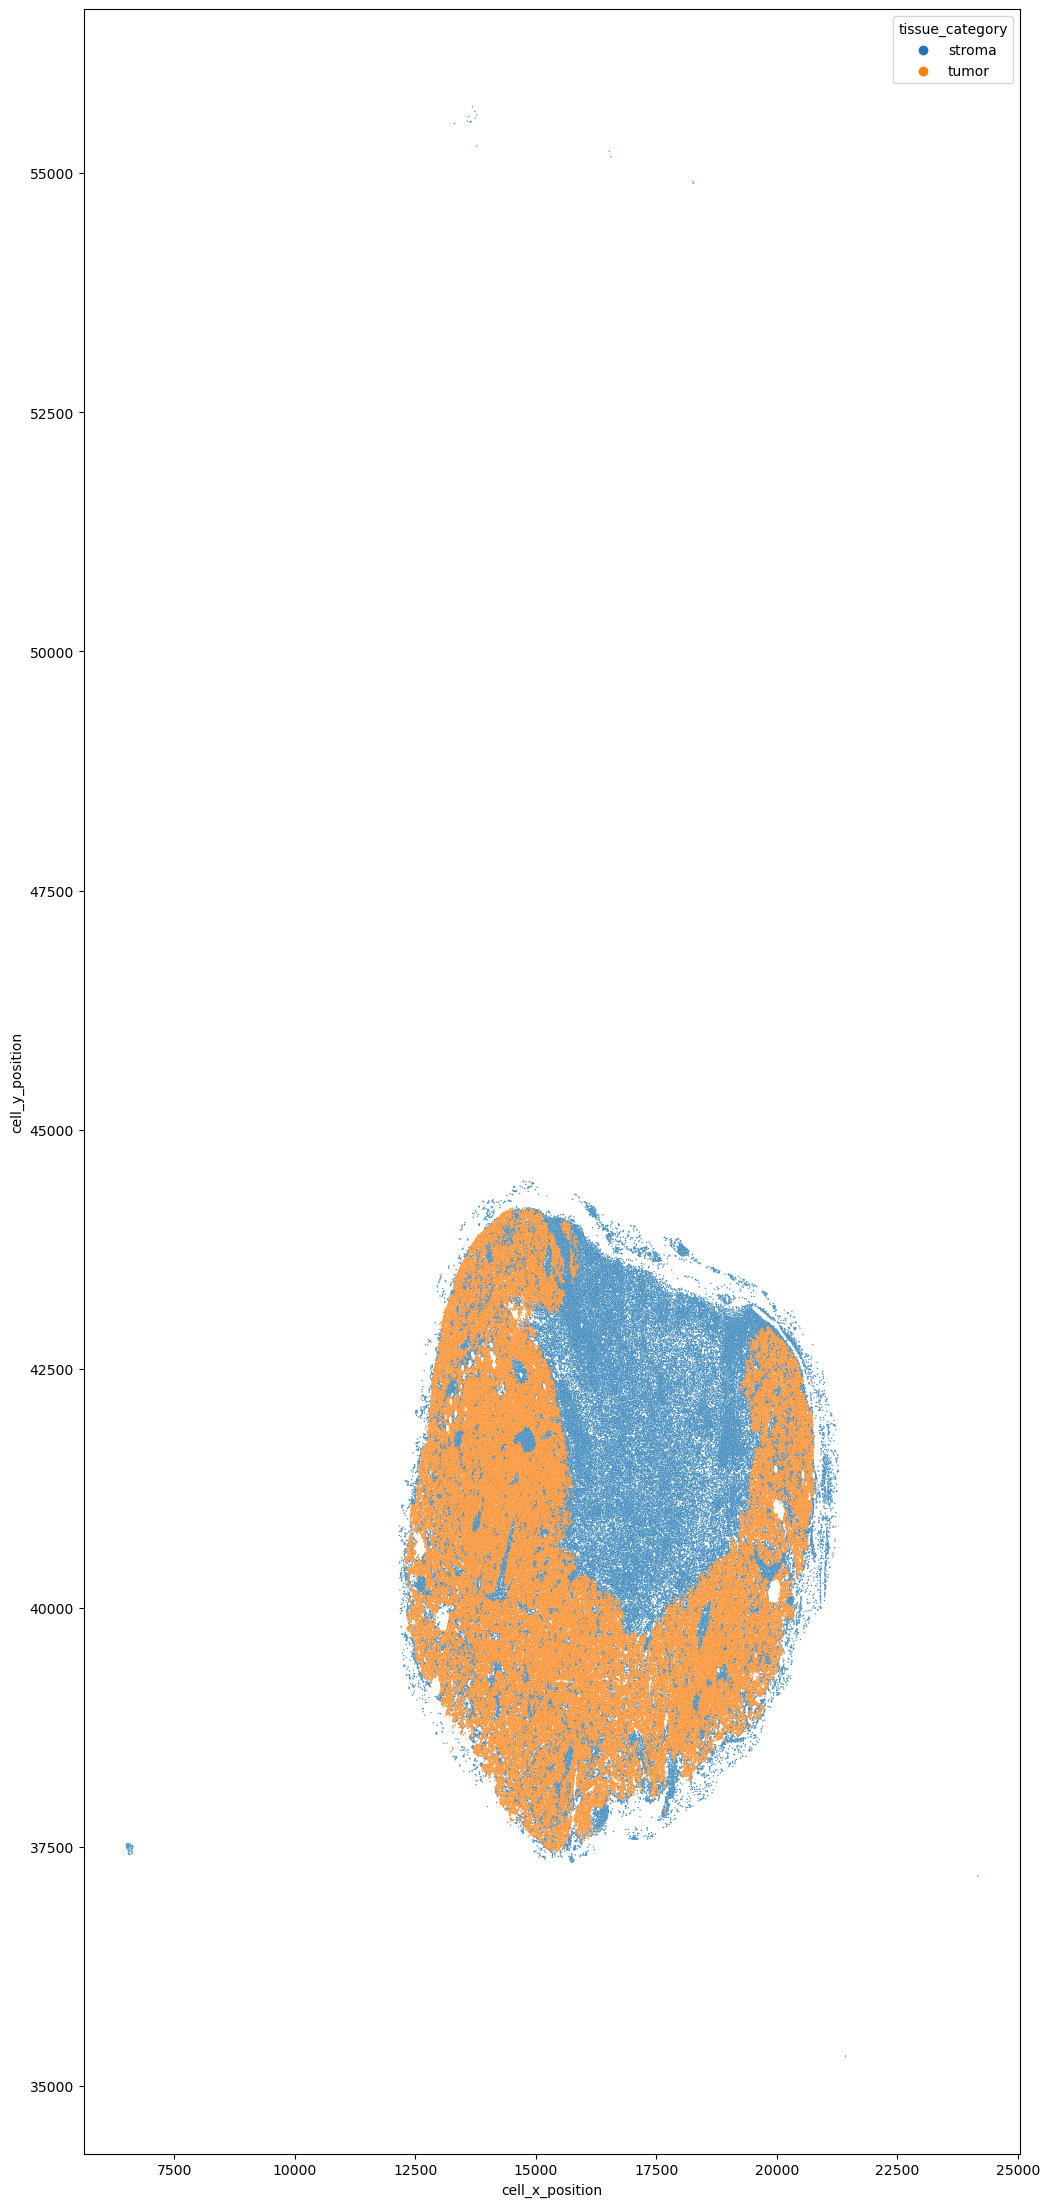

In [17]:
plt.figure(figsize=(df_nodes.cell_x_position.max()/2000,df_nodes.cell_y_position.max()/2000))
sns.scatterplot(data=df_nodes, x='cell_x_position', y='cell_y_position', hue='tissue_category', s=1)

/tmp/ipykernel_61682/3307455616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_nodes['cell_x_position'])


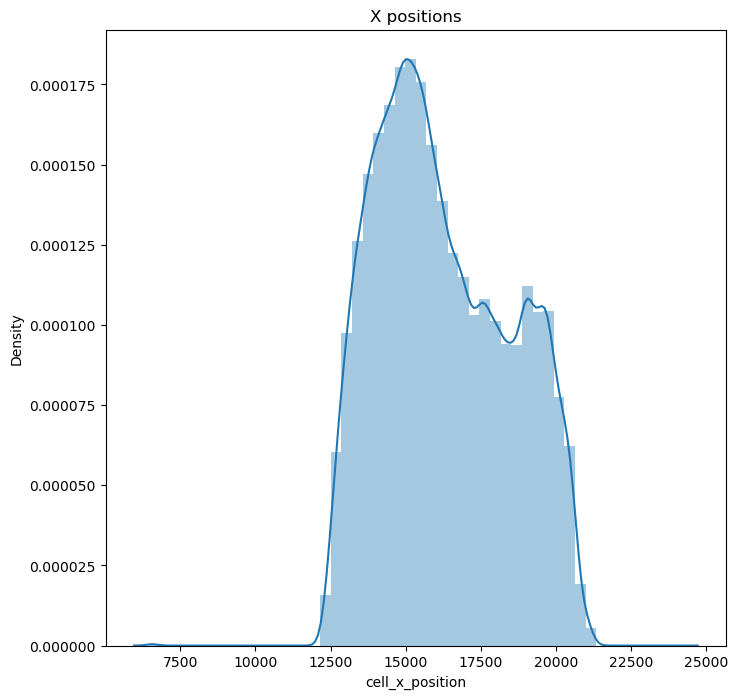

/tmp/ipykernel_61682/3307455616.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_nodes['cell_y_position'])


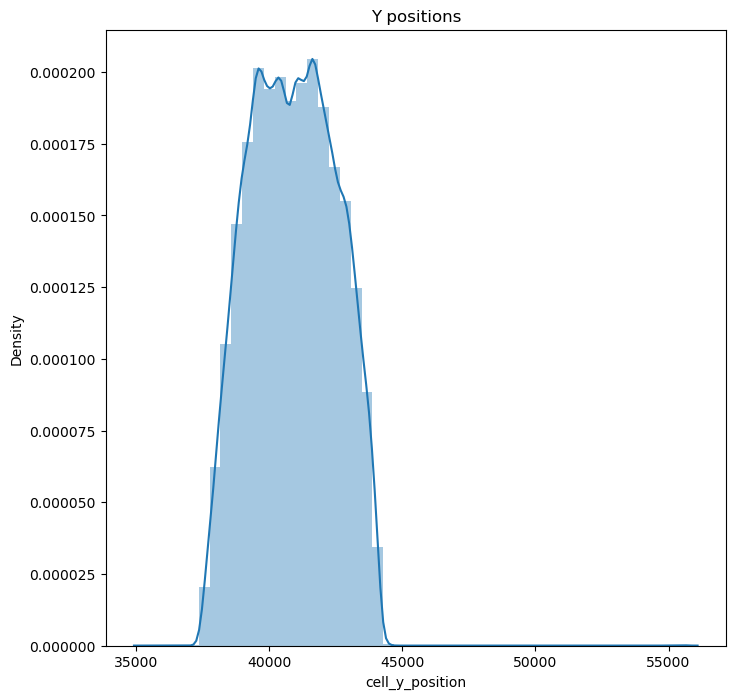

In [18]:
plt.figure(figsize=(8,8))
sns.distplot(df_nodes['cell_x_position'])
plt.title('X positions')
plt.show()

plt.figure(figsize=(8,8))
sns.distplot(df_nodes['cell_y_position'])
plt.title('Y positions')
plt.show()

<AxesSubplot: xlabel='cell_x_position', ylabel='cell_y_position'>

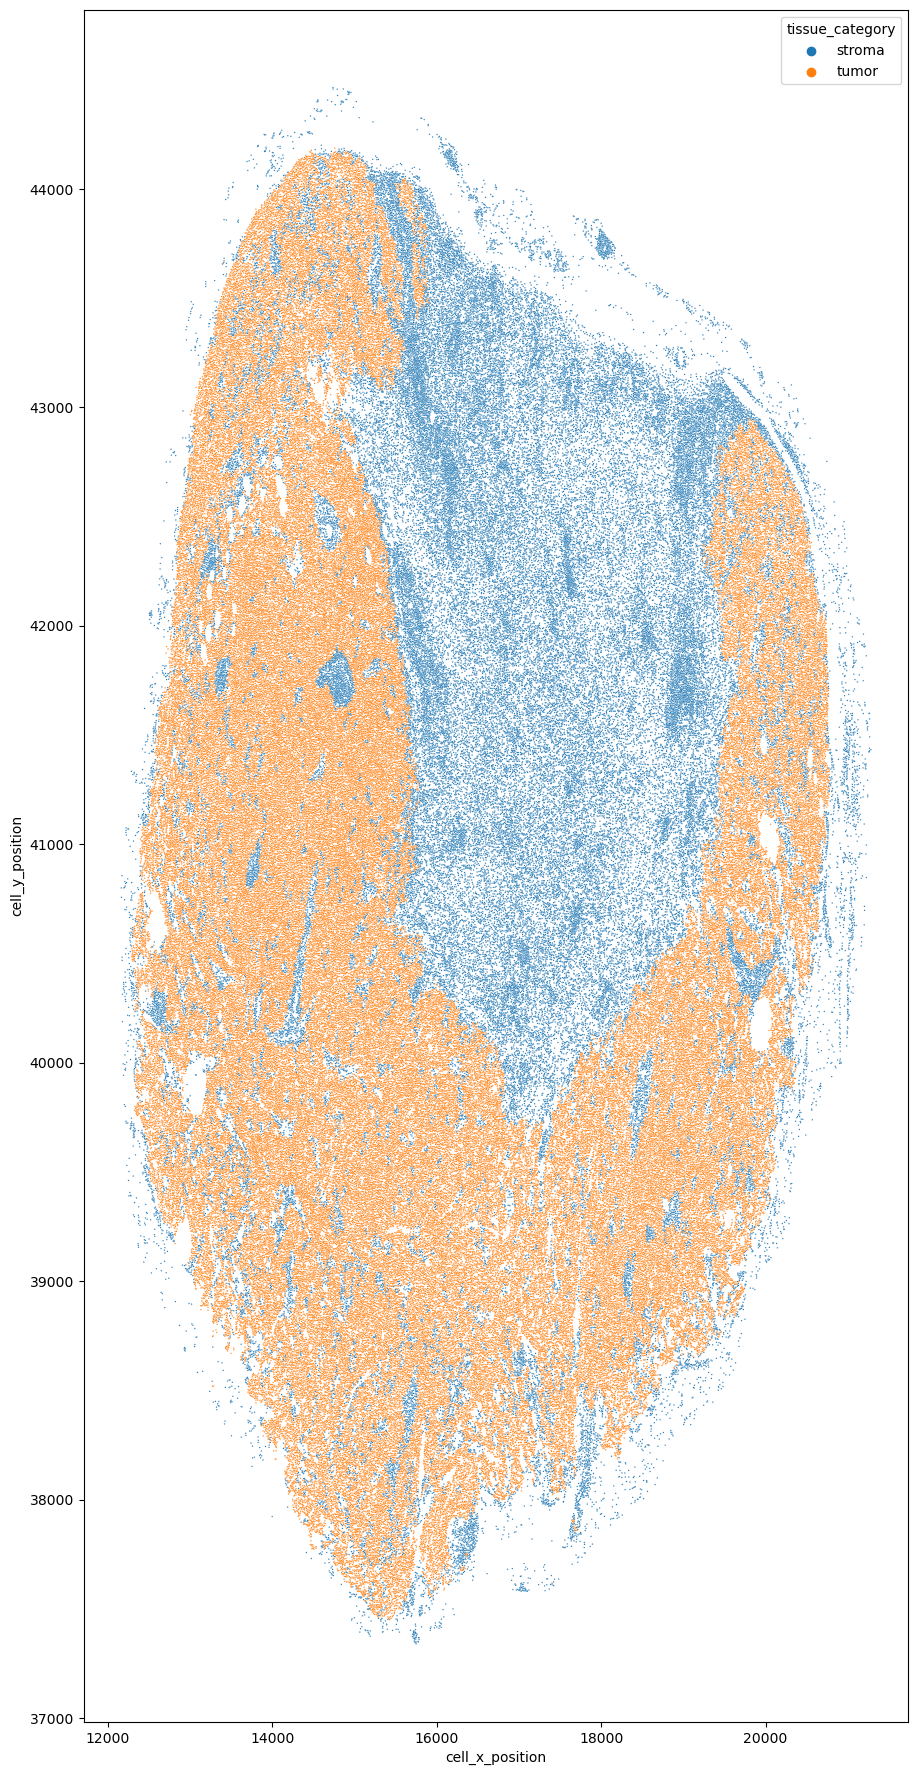

In [19]:
df_nodes = df_nodes.drop(df_nodes.index[df_nodes['cell_x_position'] > 23000])
df_nodes = df_nodes.drop(df_nodes.index[df_nodes['cell_y_position'] > 45000])

df_nodes = df_nodes.drop(df_nodes.index[df_nodes['cell_x_position'] < 7500])
df_nodes = df_nodes.drop(df_nodes.index[df_nodes['cell_y_position'] < 36000])

plt.figure(figsize=(df_nodes.cell_x_position.max()/2000,df_nodes.cell_y_position.max()/2000))
sns.scatterplot(data=df_nodes, x='cell_x_position', y='cell_y_position', hue='tissue_category', s=1)

<AxesSubplot: xlabel='cell_x_position', ylabel='cell_y_position'>

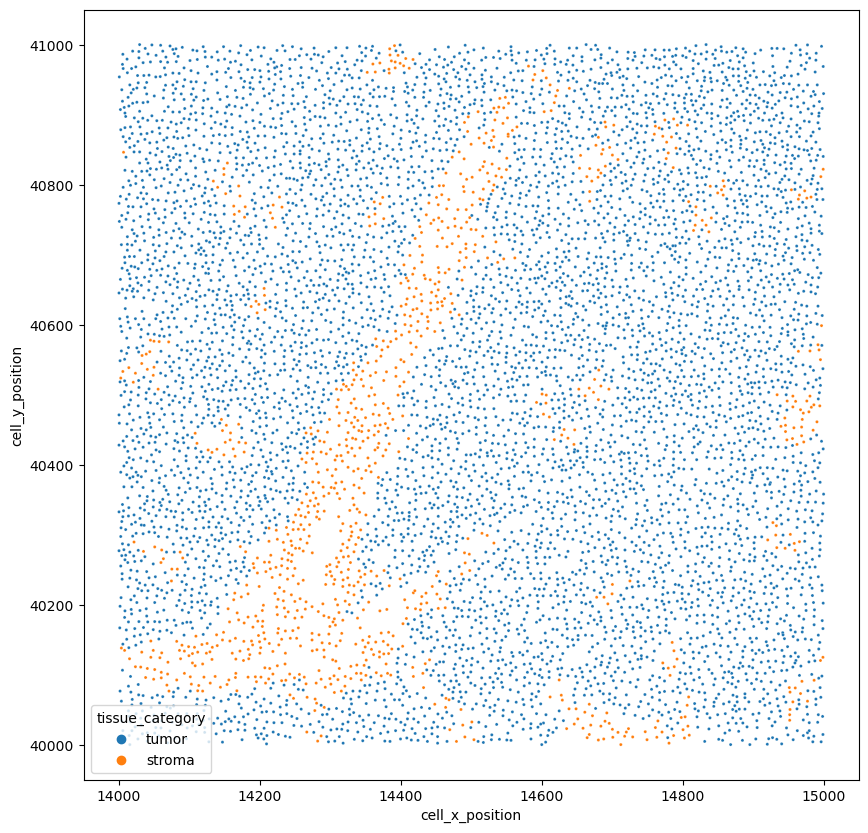

In [20]:
df_small = df_nodes.copy()
df_small = df_small.drop(df_small.index[df_small['cell_x_position'] > 15000])
df_small = df_small.drop(df_small.index[df_small['cell_y_position'] > 41000])

df_small = df_small.drop(df_small.index[df_small['cell_x_position'] < 14000])
df_small = df_small.drop(df_small.index[df_small['cell_y_position'] < 40000])

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_small, x='cell_x_position', y='cell_y_position', hue='tissue_category', s=5)

In [21]:
path_edges = "/home/sedykh/CHUVdata/IFQuant/version_2/output/01_preprocessed/DEEPMEL_1C1/edges_30.csv"
df_edges = pd.read_csv(path_edges)

In [22]:
df_edges

cell_id_1 phenotype_1 tissue_category_1  cell_id_2 phenotype_2  \
0          186592           T            stroma     186484           T   
1           73942    melanoma             tumor      75363     stromal   
2           97213    melanoma             tumor      95869    melanoma   
3          148252    melanoma             tumor     148499    melanoma   
4           80769    melanoma             tumor      81321    melanoma   
...           ...         ...               ...        ...         ...   
753463     180977     stromal            stroma     181551          NK   
753464      22271    melanoma             tumor      20960    melanoma   
753465     198823    melanoma             tumor     199316    melanoma   
753466      22665    melanoma             tumor      21543     stromal   
753467     188320     stromal            stroma     187987     stromal   

       tissue_category_2   distance  on_border  
0                 stroma  11.313708      False  
1                  tumor  10.606602      False  
2                  tumor  22.249719      False  
3                  tumor  13.121357       True  
4                  tumor  10.511898      False  
...                  ...        ...        ...  
753463            stroma  14.160508      False  
753464             tumor   8.634813       True  
753465             tumor  17.219175      False  
753466             tumor  16.256076      False  
753467            stroma  14.702721      False  

[753468 rows x 8 columns]

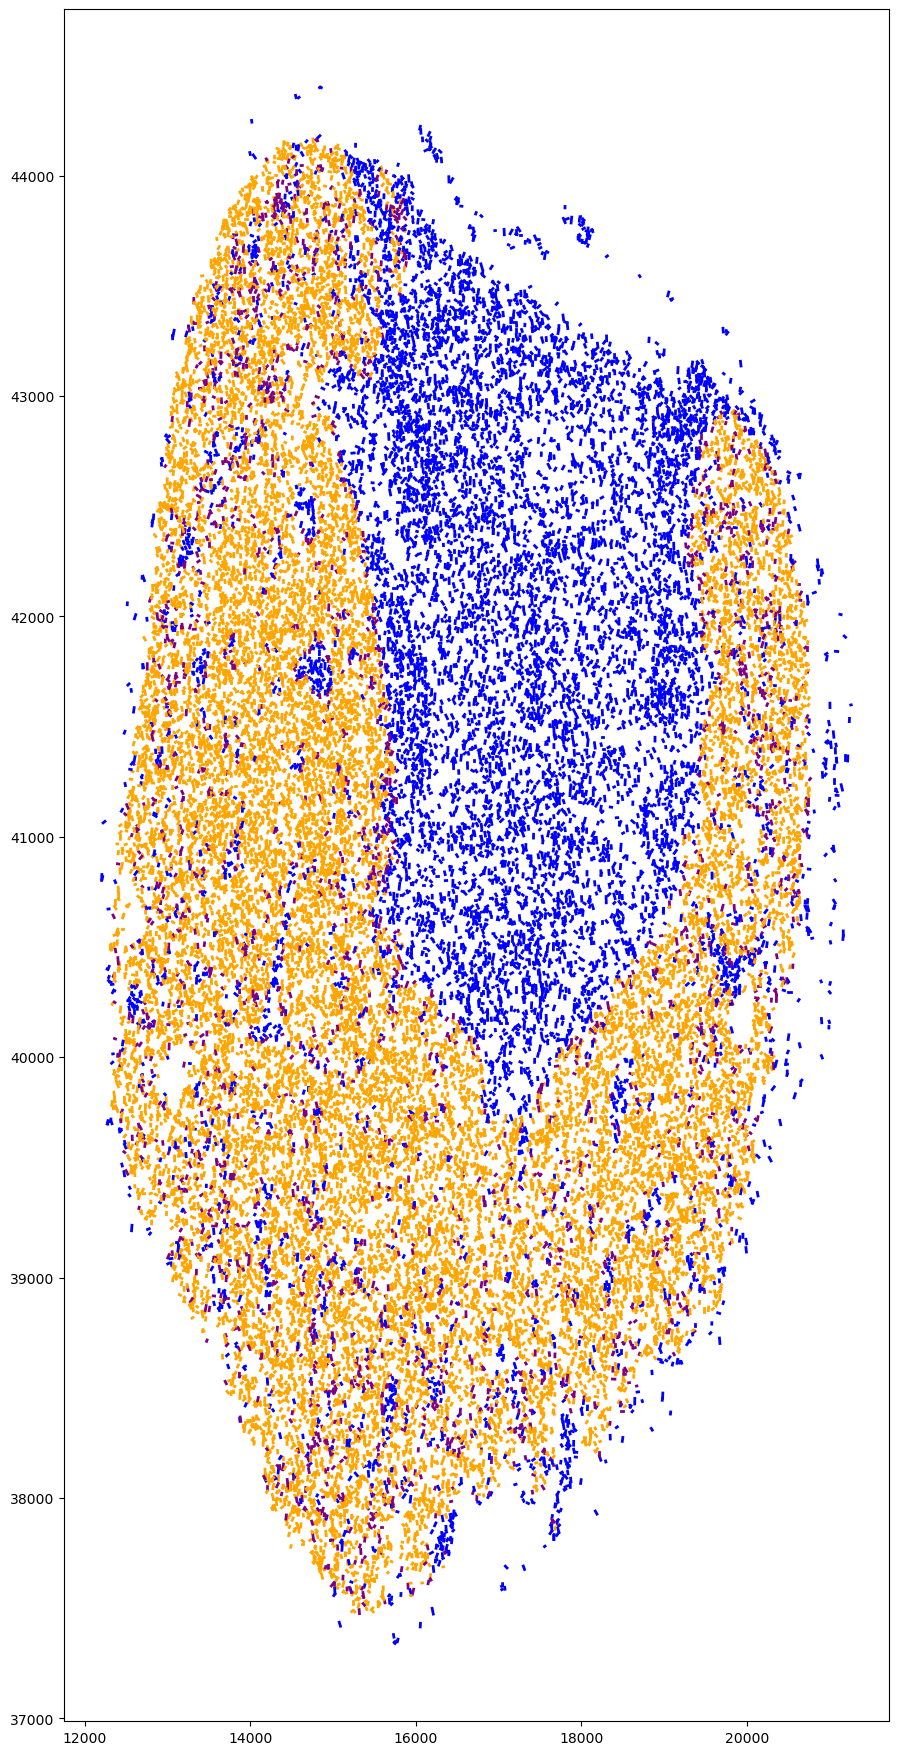

In [23]:
plt.figure(figsize=(df_nodes.cell_x_position.max()/2000,df_nodes.cell_y_position.max()/2000))

color_dict = {"stroma": "blue", "tumor": "orange", "mix": "purple"}
for index, row in df_edges[:30000].iterrows():
    try:
   
        x_pos1= df_nodes[df_nodes['cell_id']==row['cell_id_1']].cell_x_position.item()
        y_pos1= df_nodes[df_nodes['cell_id']==row['cell_id_1']].cell_y_position.item()

        x_pos2= df_nodes[df_nodes['cell_id']==row['cell_id_2']].cell_x_position.item()
        y_pos2= df_nodes[df_nodes['cell_id']==row['cell_id_2']].cell_y_position.item()

        if row['tissue_category_1']=="stroma" and row['tissue_category_2']=="stroma":
            color = color_dict["stroma"]
        elif row['tissue_category_1']=="tumor" and row['tissue_category_2']=="tumor":
            color = color_dict["tumor"]
        else:
            color = color_dict["mix"]
        plt.plot([x_pos1, x_pos2], [y_pos1, y_pos2], linewidth=2, markersize=12, color=color)
    except:
        continue #print(row) 


In [24]:
df_nodes[df_nodes['cell_id']==186484]

cell_id  cell_x_position  cell_y_position tissue_category phenotype  \
152853   186484          16866.8          43036.3          stroma         T   

        on_border  region  
152853      False  stroma

### One patch

In [26]:
df_nodes_patch = df_nodes.copy()
df_nodes_patch = df_nodes_patch.drop(df_nodes_patch.index[df_nodes_patch['cell_x_position'] > 15000])
df_nodes_patch = df_nodes_patch.drop(df_nodes_patch.index[df_nodes_patch['cell_y_position'] > 41000])

df_nodes_patch = df_nodes_patch.drop(df_nodes_patch.index[df_nodes_patch['cell_x_position'] < 14000])
df_nodes_patch = df_nodes_patch.drop(df_nodes_patch.index[df_nodes_patch['cell_y_position'] < 40000])


df_edges_patch1 = df_edges[df_edges['cell_id_1'].isin(df_nodes_patch['cell_id'])]
df_edges_patch2 = df_edges[df_edges['cell_id_2'].isin(df_nodes_patch['cell_id'])]
df_edges_patch = df_edges_patch1.merge(df_edges_patch2)

df_edges_patch

cell_id_1 phenotype_1 tissue_category_1  cell_id_2 phenotype_2  \
0          94562    melanoma             tumor      95252    melanoma   
1          68577     stromal            stroma      69479           T   
2          66765    melanoma             tumor      67316    melanoma   
3          65982    melanoma             tumor      65934    melanoma   
4          67004     stromal            stroma      65725    melanoma   
...          ...         ...               ...        ...         ...   
22058      91425    melanoma             tumor      91010    melanoma   
22059      96474    melanoma             tumor      97411     stromal   
22060      96045    melanoma             tumor      97059    melanoma   
22061      92571     stromal             tumor      91043    melanoma   
22062      65576     stromal            stroma      66883     stromal   

      tissue_category_2   distance  on_border  
0                 tumor   7.068239      False  
1                stroma  13.366376       True  
2                 tumor  13.822446       True  
3                 tumor   9.972963      False  
4                 tumor  11.629703       True  
...                 ...        ...        ...  
22058             tumor   8.709765      False  
22059            stroma   9.950377       True  
22060             tumor   8.875246       True  
22061             tumor  16.240998       True  
22062            stroma  11.543396       True  

[22063 rows x 8 columns]

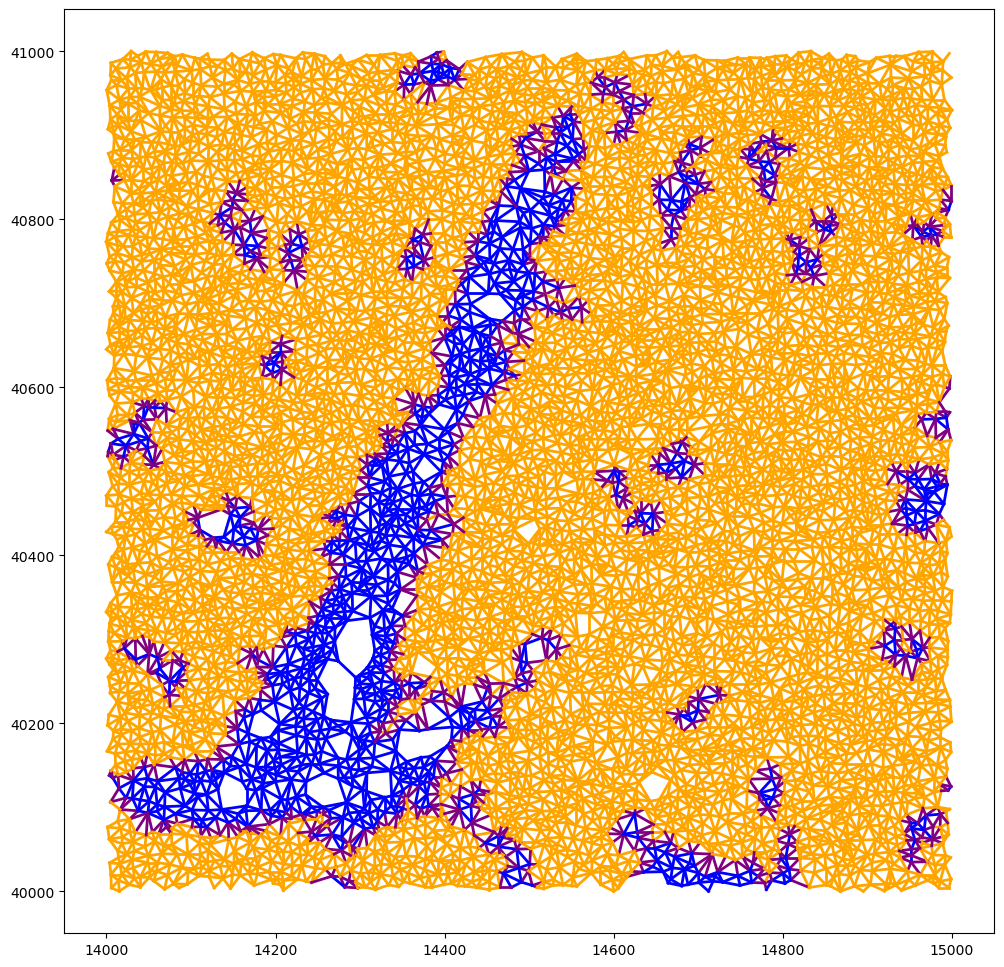

In [27]:
plt.figure(figsize=(12,12))

color_dict = {"stroma": "blue", "tumor": "orange", "mix": "purple"}
for index, row in df_edges_patch.iterrows():
    #try:
   
    x_pos1= df_nodes_patch[df_nodes_patch['cell_id']==row['cell_id_1']].cell_x_position.item()
    y_pos1= df_nodes_patch[df_nodes_patch['cell_id']==row['cell_id_1']].cell_y_position.item()
    #print(index, row['cell_id_2'])
    #print(df_nodes_patch[df_nodes_patch['cell_id']==row['cell_id_2']].cell_x_position)
    x_pos2= df_nodes_patch[df_nodes_patch['cell_id']==row['cell_id_2']].cell_x_position.item()
    y_pos2= df_nodes_patch[df_nodes_patch['cell_id']==row['cell_id_2']].cell_y_position.item()

    if row['tissue_category_1']=="stroma" and row['tissue_category_2']=="stroma":
        color = color_dict["stroma"]
    elif row['tissue_category_1']=="tumor" and row['tissue_category_2']=="tumor":
        color = color_dict["tumor"]
    else:
        color = color_dict["mix"]
    plt.plot([x_pos1, x_pos2], [y_pos1, y_pos2], linewidth=2, markersize=12, color=color)


### Select patches

In [28]:
def create_grid(df_nodes, patch_size = 512, cell_count_threshold = 0, rotate=0, shift = 0, draw_plot = False):
    graph = df_nodes.copy()
    graph['patch'] = np.nan
    graph['patch_loc_x'] = np.nan
    graph['patch_loc_y'] = np.nan
    graph['patch_real_loc_x'] = np.nan
    graph['patch_real_loc_y'] = np.nan
    
    xs = graph.cell_x_position
    ys = graph.cell_y_position
     
    
    if rotate:
        RotRad = math.radians(rotate)

        # 2D rotation matrix, clockwise
        RotMatrix = np.array([[np.cos(RotRad),  np.sin(RotRad)],
                              [-np.sin(RotRad), np.cos(RotRad)]])
        rotated = np.einsum('ji, mni -> jmn', RotMatrix, np.dstack([xs, ys]))
        graph.cell_x_position = rotated[0][0]
        graph.cell_y_position = rotated[1][0]

    
    # Get min max border coordinates
    min_border_x = graph.cell_x_position.min()
    min_border_y = graph.cell_y_position.min()
    
    # Shift to 0,0
    graph.cell_x_position = graph.cell_x_position - min_border_x
    graph.cell_y_position = graph.cell_y_position - min_border_y
    
    max_border_x = graph.cell_x_position.max()
    max_border_y = graph.cell_y_position.max()
    
        
    # Get mesh grip
    xspan = np.arange(-patch_size, max_border_x+patch_size, patch_size)
    yspan = np.arange(-patch_size, max_border_y+patch_size, patch_size)
    
    mesh_x, mesh_y  = np.meshgrid(xspan, yspan) 
    
    if shift:
        mesh_x = mesh_x + shift
        mesh_y = mesh_y + shift
        
    coordsx = mesh_x[0]
    coordsy = np.transpose(mesh_y)[0]
    coordsx = [0] + coordsx
    coordsy = [0] + coordsy

    ip = 0 # patch number
    for ix,xmesh in enumerate(coordsx[:-1]):
        for iy, ymesh in enumerate(coordsy[:-1]):
            df_nodes_patch = graph.copy()
            
            # Check if inside the patch        
            indexlist = df_nodes_patch.index[(df_nodes_patch['cell_x_position'] >coordsx[ix]) 
                                 & (df_nodes_patch['cell_x_position'] < coordsx[ix+1])
                                 &(df_nodes_patch['cell_y_position'] >coordsy[iy]) 
                                 & (df_nodes_patch['cell_y_position'] < coordsy[iy+1])]
            
            if len(indexlist) >= cell_count_threshold: # if number of cells in patch > sth -> valid patch
                graph["patch"].iloc[indexlist] = ip
                ip += 1
                
                mid_x = (coordsx[ix] +coordsx[ix+1]) / 2
                mid_y = (coordsy[iy] +coordsy[iy+1]) / 2
                graph["patch_real_loc_x"].iloc[indexlist] = mid_x
                graph["patch_real_loc_y"].iloc[indexlist] = mid_y
                graph["patch_loc_x"].iloc[indexlist] = ix 
                graph["patch_loc_y"].iloc[indexlist] = iy                 
            

    if draw_plot == True:
        plt.figure(figsize=(graph.cell_x_position.max()/1500,graph.cell_y_position.max()/1500))
        plt.plot(mesh_x, mesh_y, color='k')
        plt.plot(np.transpose(mesh_x), np.transpose(mesh_y), color='k')
        scat = sns.scatterplot(data=graph, x='cell_x_position', y='cell_y_position', hue='phenotype', s=3) #tissue_category
        plt.show()
        
    graph = graph[graph['patch'].notna()]

    return graph

/tmp/ipykernel_61682/3281355377.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph["patch"].iloc[indexlist] = ip
/tmp/ipykernel_61682/3281355377.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph["patch_real_loc_x"].iloc[indexlist] = mid_x
/tmp/ipykernel_61682/3281355377.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph["patch_real_loc_y"].iloc[indexlist] = mid_y
/tmp/ipykernel_61682/3281355377.py:70: SettingWi

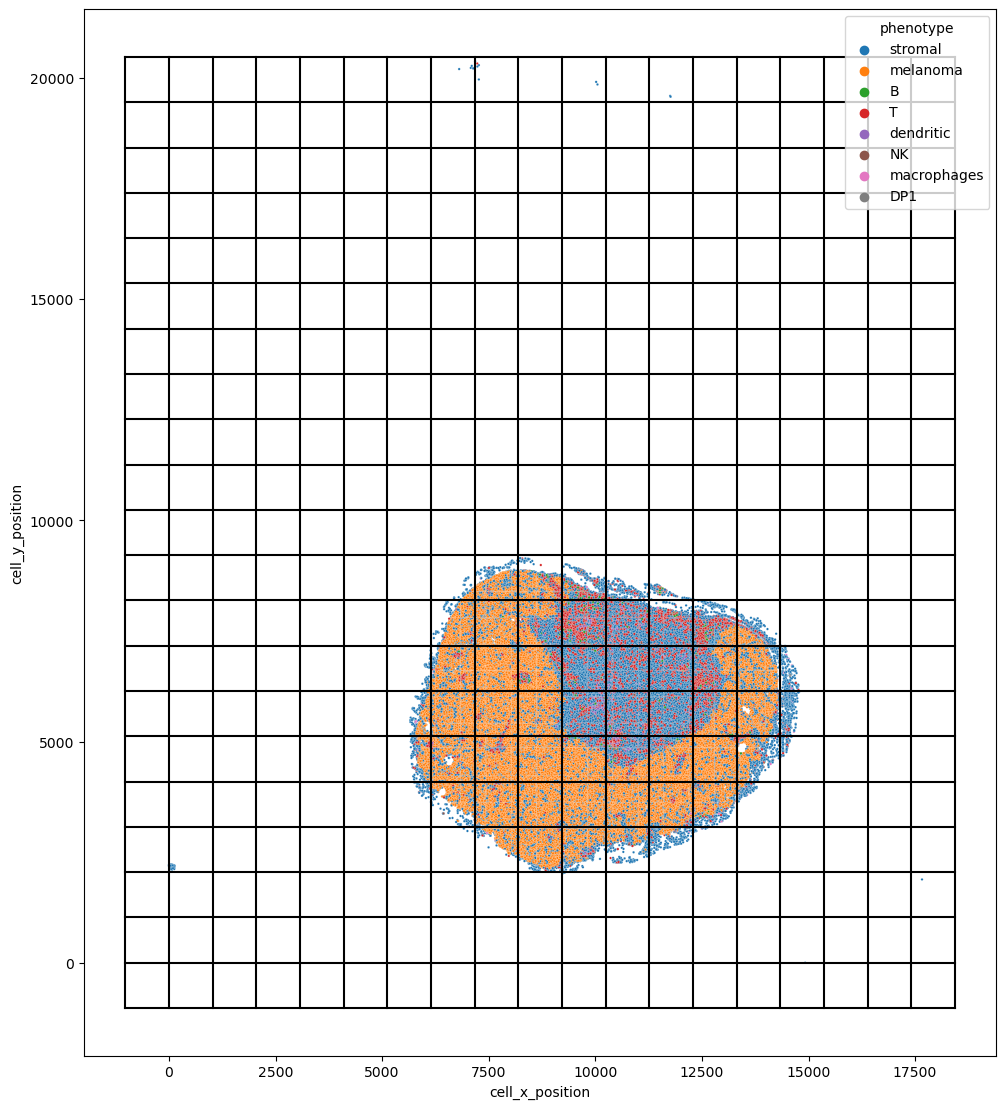

In [32]:
patches_df = create_grid(df_nodes, patch_size = 1024, cell_count_threshold = 50, rotate = 0, shift = 0, draw_plot=True)
patches_df.to_csv('out_nodes.csv')  

In [33]:
patches_df

cell_id  cell_x_position  cell_y_position tissue_category phenotype  \
0          9335           5671.7           5154.2          stroma   stromal   
1          9425           5670.7           5168.6          stroma   stromal   
2          9520           5662.2           5443.0          stroma   stromal   
3          9561           5669.2           5542.2          stroma   stromal   
4          9585           5660.7           5486.1          stroma   stromal   
...         ...              ...              ...             ...       ...   
258863   327786             19.8           2206.5          stroma   stromal   
258864   327787             41.7           2202.5          stroma   stromal   
258866   327789             87.8           2201.5          stroma   stromal   
258867   327790             38.7           2192.1          stroma   stromal   
258868   327791             94.3           2137.5          stroma   stromal   

        on_border  region  patch  patch_loc_x  patch_loc_y  patch_real_loc_x  \
0           False  stroma    3.0          6.0          6.0            5632.0   
1           False  stroma    3.0          6.0          6.0            5632.0   
2           False  stroma    3.0          6.0          6.0            5632.0   
3           False  stroma    3.0          6.0          6.0            5632.0   
4           False  stroma    3.0          6.0          6.0            5632.0   
...           ...     ...    ...          ...          ...               ...   
258863      False  stroma    0.0          1.0          3.0             512.0   
258864      False  stroma    0.0          1.0          3.0             512.0   
258866      False  stroma    0.0          1.0          3.0             512.0   
258867      False  stroma    0.0          1.0          3.0             512.0   
258868      False  stroma    0.0          1.0          3.0             512.0   

        patch_real_loc_y  
0                 5632.0  
1                 5632.0  
2                 5632.0  
3                 5632.0  
4                 5632.0  
...                  ...  
258863            2560.0  
258864            2560.0  
258866            2560.0  
258867            2560.0  
258868            2560.0  

[258784 rows x 12 columns]

<AxesSubplot: xlabel='patch_loc_x', ylabel='patch_loc_y'>

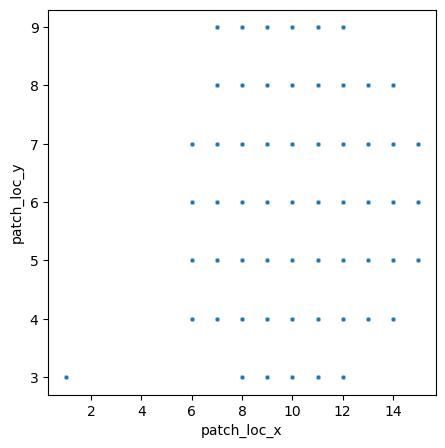

In [34]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=patches_df, x='patch_loc_x', y='patch_loc_y', s=10)

In [35]:
#patches_df[patches_df.patch==1]
df_nodes_patches = patches_df
df_edges_patches = pd.DataFrame()
for i in tqdm.tqdm(range(len(df_nodes_patches.patch.unique()))): #iterate all patches
    df_patch = df_nodes_patches[df_nodes_patches.patch==i]
    df_edges_patch1 = df_edges[df_edges['cell_id_1'].isin(df_patch['cell_id'])]
    df_edges_patch2 = df_edges[df_edges['cell_id_2'].isin(df_patch['cell_id'])]
    df_edges_patch = df_edges_patch1.merge(df_edges_patch2)
    df_edges_patch["patch"] = i
    df_edges_patches = pd.concat([df_edges_patches,df_edges_patch])

100%|██████████| 59/59 [00:03<00:00, 16.62it/s]


In [36]:
df_edges_patches.to_csv('out_edges.csv')  
df_edges_patches

cell_id_1 phenotype_1 tissue_category_1  cell_id_2 phenotype_2  \
0       327758     stromal            stroma     327784     stromal   
1       327768     stromal            stroma     327757     stromal   
2       327784     stromal            stroma     327740     stromal   
3       327770     stromal            stroma     327747     stromal   
4       327776     stromal            stroma     327741     stromal   
..         ...         ...               ...        ...         ...   
371     312696     stromal            stroma     312546     stromal   
372     312456     stromal            stroma     313344     stromal   
373     313921     stromal            stroma     314113     stromal   
374     313244     stromal            stroma     312780     stromal   
375     313055     stromal            stroma     312445     stromal   

    tissue_category_2   distance  on_border  patch  
0              stroma  18.327302      False      0  
1              stroma  14.676853      False      0  
2              stroma  22.305605      False      0  
3              stroma  21.071782      False      0  
4              stroma  20.035219      False      0  
..                ...        ...        ...    ...  
371            stroma  21.236054      False     58  
372            stroma  13.231024      False     58  
373            stroma  27.961402      False     58  
374            stroma  21.498139      False     58  
375            stroma   7.963040      False     58  

[740542 rows x 9 columns]

/tmp/ipykernel_61682/3281355377.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph["patch"].iloc[indexlist] = ip
/tmp/ipykernel_61682/3281355377.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph["patch_real_loc_x"].iloc[indexlist] = mid_x
/tmp/ipykernel_61682/3281355377.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph["patch_real_loc_y"].iloc[indexlist] = mid_y
/tmp/ipykernel_61682/3281355377.py:70: SettingWi

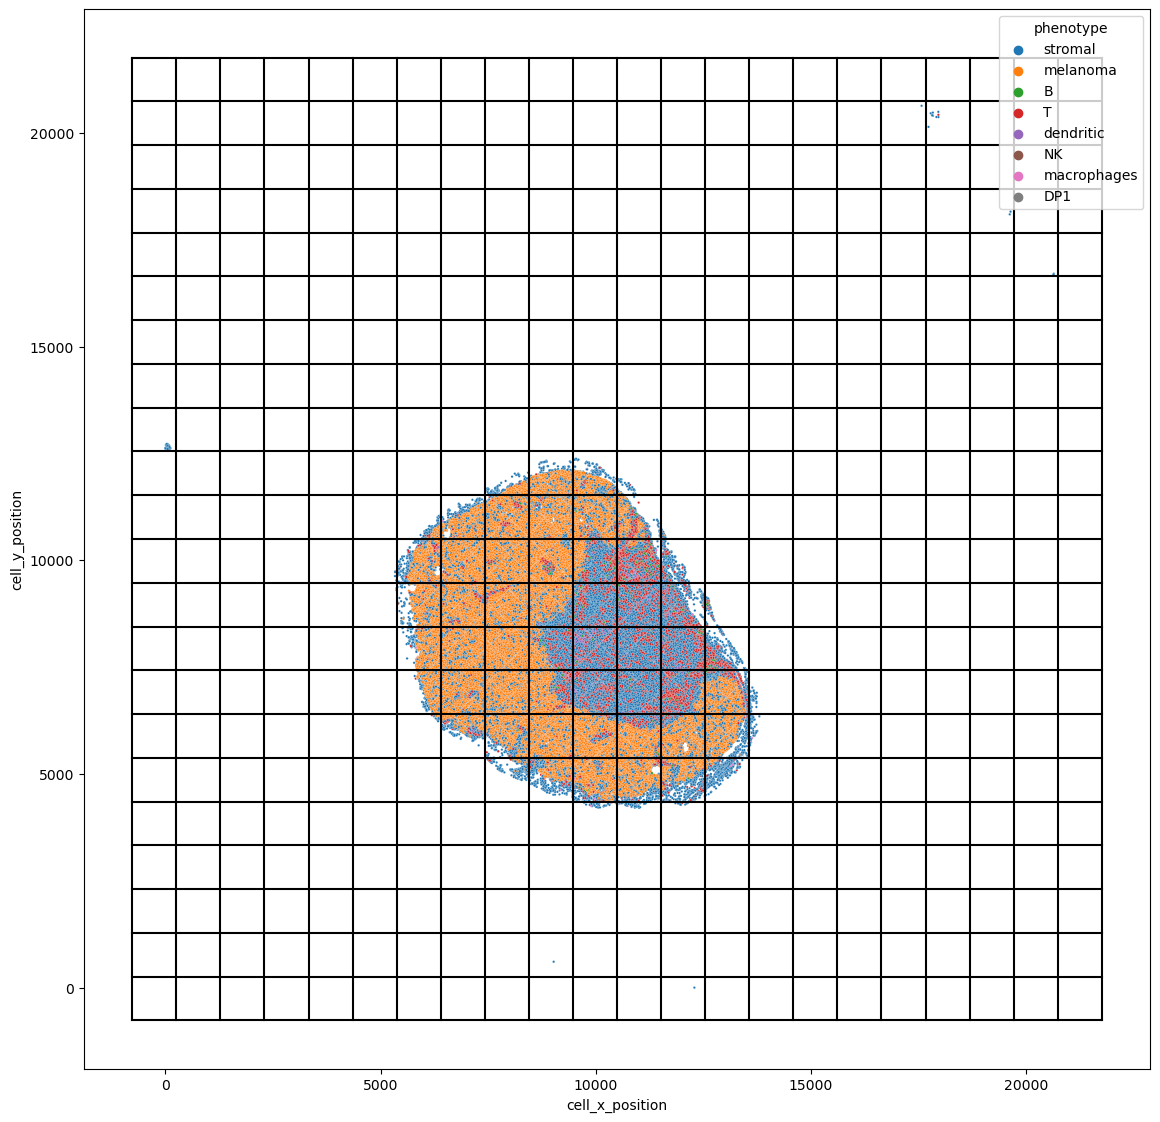

cell_id  cell_x_position  cell_y_position tissue_category phenotype  \
0          9335      6127.080259     10791.156588          stroma   stromal   
1          9425      6136.555490     10802.046032          stroma   stromal   
2          9520      6324.575183     11002.086541          stroma   stromal   
3          9561      6399.669923     11067.281786          stroma   stromal   
4          9585      6353.990825     11033.623503          stroma   stromal   
...         ...              ...              ...             ...       ...   
258811   318256     13545.973897      5552.414578          stroma   stromal   
258812   318298     13557.570448      5472.794354          stroma   stromal   
258813   318309     13542.862627      5561.182702          stroma   stromal   
258814   318343     13565.631465      5556.657219          stroma   stromal   
258815   318356     13555.802681      5540.464473          stroma   stromal   

        on_border  region  patch  patch_loc_x  patch_loc_y  patch_real_loc_x  \
0           False  stroma    4.0          6.0         11.0            5888.0   
1           False  stroma    4.0          6.0         11.0            5888.0   
2           False  stroma    4.0          6.0         11.0            5888.0   
3           False  stroma    4.0          6.0         11.0            5888.0   
4           False  stroma    4.0          6.0         11.0            5888.0   
...           ...     ...    ...          ...          ...               ...   
258811      False  stroma   50.0         13.0          6.0           13056.0   
258812      False  stroma   50.0         13.0          6.0           13056.0   
258813      False  stroma   50.0         13.0          6.0           13056.0   
258814      False  stroma   50.0         13.0          6.0           13056.0   
258815      False  stroma   50.0         13.0          6.0           13056.0   

        patch_real_loc_y  
0                11008.0  
1                11008.0  
2                11008.0  
3                11008.0  
4                11008.0  
...                  ...  
258811            5888.0  
258812            5888.0  
258813            5888.0  
258814            5888.0  
258815            5888.0  

[258381 rows x 12 columns]

In [37]:
create_grid(df_nodes, patch_size = 1024, cell_count_threshold = 100, rotate = 45, shift = 256, draw_plot=True)

/tmp/ipykernel_61682/3281355377.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph["patch"].iloc[indexlist] = ip
/tmp/ipykernel_61682/3281355377.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph["patch_real_loc_x"].iloc[indexlist] = mid_x
/tmp/ipykernel_61682/3281355377.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph["patch_real_loc_y"].iloc[indexlist] = mid_y
/tmp/ipykernel_61682/3281355377.py:70: SettingWi

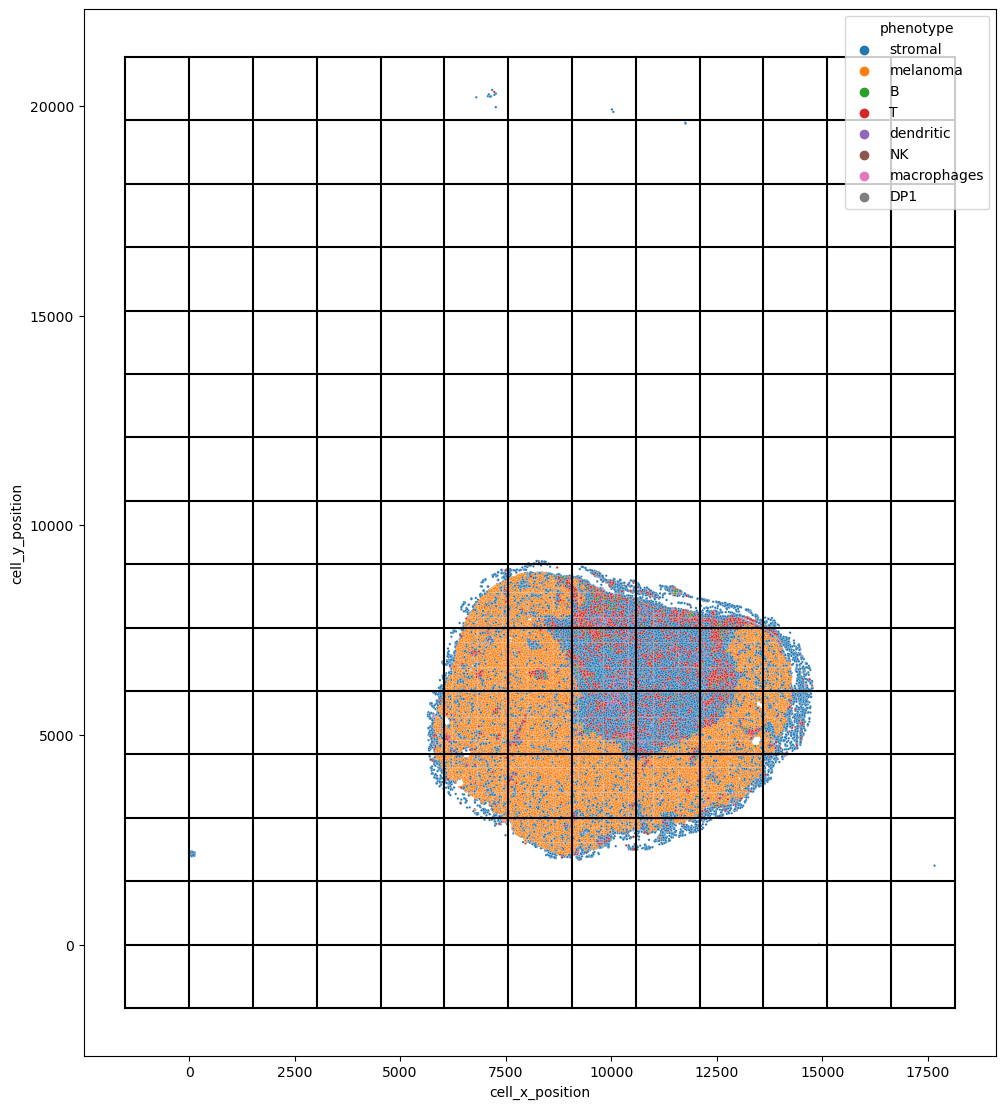

cell_id  cell_x_position  cell_y_position tissue_category phenotype  \
0          9335           5671.7           5154.2          stroma   stromal   
1          9425           5670.7           5168.6          stroma   stromal   
2          9520           5662.2           5443.0          stroma   stromal   
3          9561           5669.2           5542.2          stroma   stromal   
4          9585           5660.7           5486.1          stroma   stromal   
...         ...              ...              ...             ...       ...   
258863   327786             19.8           2206.5          stroma   stromal   
258864   327787             41.7           2202.5          stroma   stromal   
258866   327789             87.8           2201.5          stroma   stromal   
258867   327790             38.7           2192.1          stroma   stromal   
258868   327791             94.3           2137.5          stroma   stromal   

        on_border  region  patch  patch_loc_x  patch_loc_y  patch_real_loc_x  \
0           False  stroma    2.0          4.0          4.0            5292.0   
1           False  stroma    2.0          4.0          4.0            5292.0   
2           False  stroma    2.0          4.0          4.0            5292.0   
3           False  stroma    2.0          4.0          4.0            5292.0   
4           False  stroma    2.0          4.0          4.0            5292.0   
...           ...     ...    ...          ...          ...               ...   
258863      False  stroma    0.0          1.0          2.0             756.0   
258864      False  stroma    0.0          1.0          2.0             756.0   
258866      False  stroma    0.0          1.0          2.0             756.0   
258867      False  stroma    0.0          1.0          2.0             756.0   
258868      False  stroma    0.0          1.0          2.0             756.0   

        patch_real_loc_y  
0                 5292.0  
1                 5292.0  
2                 5292.0  
3                 5292.0  
4                 5292.0  
...                  ...  
258863            2268.0  
258864            2268.0  
258866            2268.0  
258867            2268.0  
258868            2268.0  

[258739 rows x 12 columns]

In [38]:
create_grid(df_nodes, patch_size = 1512, cell_count_threshold = 50, rotate = 0, shift = 0, draw_plot=True)

In [39]:
patch_size = 1024
path_nodes = "out_nodes.csv"
df_nodes_patches = pd.read_csv(path_nodes)

path_edges = "out_edges.csv"
df_edges_patches = pd.read_csv(path_edges)

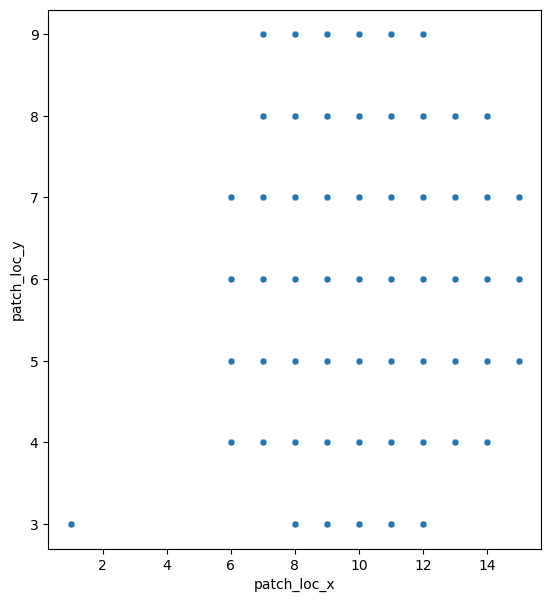

In [40]:
plt.figure(figsize=(14,7))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_nodes_patches,x='patch_loc_x', y='patch_loc_y', s=25)

loc_nodes = df_nodes_patches.groupby(['patch_loc_x','patch_loc_y','patch_real_loc_x','patch_real_loc_y']).size().reset_index()
#loc_nodes["ind"] = range(1, len(loc_nodes) + 1)

xs =  loc_nodes.patch_loc_x.unique()
ys =  loc_nodes.patch_loc_y.unique()
valid_nodes = df_nodes_patches.set_index(['patch_loc_x','patch_loc_y']).index.unique()

edges_graph = pd.DataFrame({'node_id_1':[], 'node_id_2':[], 'loc1x':[], 'loc1y':[], 'loc2x':[], 'loc2y':[]})

for ix,x in enumerate(xs):
    for iy,y in enumerate(ys):
        if (xs[ix],ys[iy]) in valid_nodes:
            if (xs[ix]+1,ys[iy]) in valid_nodes: #check right neighbour
                patch_id1 = df_nodes_patches[(df_nodes_patches.patch_loc_x==xs[ix]) & (df_nodes_patches.patch_loc_y==ys[iy])]["patch"].iloc[0]
                patch_id2 = df_nodes_patches[(df_nodes_patches.patch_loc_x==xs[ix]+1) & (df_nodes_patches.patch_loc_y==ys[iy])]["patch"].iloc[0]
                edges_graph.loc[len(edges_graph.index)] = [patch_id1,patch_id2,xs[ix],ys[iy],xs[ix]+1,ys[iy]]
            if (xs[ix],ys[iy]+1) in valid_nodes: #check top neighbour
                patch_id1 = df_nodes_patches[(df_nodes_patches.patch_loc_x==xs[ix]) & (df_nodes_patches.patch_loc_y==ys[iy])]["patch"].iloc[0]
                patch_id2 = df_nodes_patches[(df_nodes_patches.patch_loc_x==xs[ix]) & (df_nodes_patches.patch_loc_y==ys[iy]+1)]["patch"].iloc[0]
                edges_graph.loc[len(edges_graph.index)] = [patch_id1,patch_id2,xs[ix],ys[iy],xs[ix],ys[iy]+1]

In [41]:
edges_graph

node_id_1  node_id_2  loc1x  loc1y  loc2x  loc2y
0         1.0        5.0    6.0    4.0    7.0    4.0
1         1.0        2.0    6.0    4.0    6.0    5.0
2         2.0        6.0    6.0    5.0    7.0    5.0
3         2.0        3.0    6.0    5.0    6.0    6.0
4         3.0        7.0    6.0    6.0    7.0    6.0
..        ...        ...    ...    ...    ...    ...
94       53.0       54.0   14.0    6.0   14.0    7.0
95       54.0       58.0   14.0    7.0   15.0    7.0
96       54.0       55.0   14.0    7.0   14.0    8.0
97       56.0       57.0   15.0    5.0   15.0    6.0
98       57.0       58.0   15.0    6.0   15.0    7.0

[99 rows x 6 columns]